# Exciton Model for vdWHs

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import ase.units
from default_parameters import get_thickness

Hartree = ase.units.Hartree
Bohr = ase.units.Bohr

In [11]:
%matplotlib inline

In [12]:
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

In [28]:
materials = ['WS2','MoS2','WSe2','MoSe2']
nFilling = 3
nPadding = 0
vdWH_data = np.load('wannier_nFilling={}_nPadding={}.npz'.format(nFilling, nPadding))

In [30]:
E_b_heat_mat = vdWH_data['E_b_heat_mat']
E_b_heat_xlabels = vdWH_data['E_b_heat_xlabels']
E_b_heat_ylabels = vdWH_data['E_b_heat_ylabels']

In [31]:
def heatmap(data, xlabels, ylabels, cbarlabel, **kwargs):
    # if not ax:
    #     ax = plt.gca()
    
    plt.imshow(data, **kwargs)
    plt.xticks(np.arange(len(xlabels)), labels=xlabels)
    plt.yticks(np.arange(len(ylabels)), labels=ylabels)
    plt.colorbar(label=cbarlabel)
    # cbar.ax.set_ylabel(cbarlabel, rotation=0, va="bottom")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            colors = ['k', 'w']
            color = colors[int(data[i,j] > np.mean(data))]
            plt.text(j, i, data[i, j], ha="center", va="center", color=color)

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 1 inner hBN layers


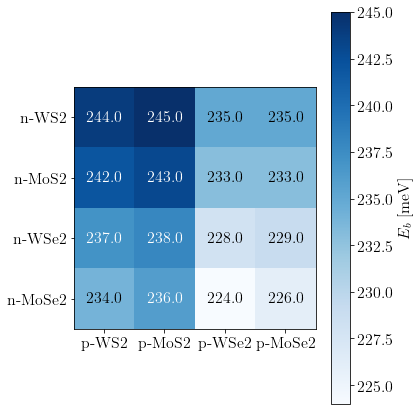

In [34]:
fig = plt.figure(1, figsize=(6,6))

description = 'Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers'.format(nPadding, nFilling)
print(description)
heatmap(np.round(E_b_heat_mat*10**3),
    E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV]',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_E_b.svg')
plt.savefig('./plots/vdWH_E_b.png')
plt.show()